## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [39]:
### You code here
import pandas as pd
dfs = pd.read_csv("C:\\Users\\vishn\\Downloads\\portfolio_data.csv")
dfs.head()


,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


The RMSE score: 75.95494360016612
The R2 Score: 0.9783453724222465


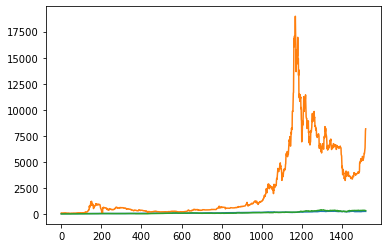

In [42]:
a = dfs.drop(['Date', 'AMZN'], axis = 1)
b = dfs['AMZN']
import matplotlib.pyplot as plt
plt.plot(a)
#split the  data in train and test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

atrain,atest,btrain,btest = train_test_split(a, b, test_size = 0.35, random_state = 0)

l_m_r = LinearRegression()
l_m_r.fit(atrain, btrain)

b_pred = l_m_r.predict(atest)
print("The RMSE score:",np.sqrt(mean_squared_error(btest, b_pred)))
print("The R2 Score:", r2_score(btest, b_pred))

In [43]:
from sklearn.ensemble import RandomForestRegressor

atrain, atest, btrain, btest = train_test_split(a, b, test_size = 0.3, random_state = 0)
r_freg = RandomForestRegressor(random_state=211)
r_freg.fit(atrain, btrain)

r_freg_pred = r_freg.predict(atest)
print("The RMSE score is",np.sqrt(mean_squared_error(btest, r_freg_pred)))
print("The R2 Score is", r2_score(btest, r_freg_pred))

The RMSE score is 29.030881296523003
The R2 Score is 0.9968733510365456


In [4]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=d0d0fdfb20647f8adec6492f69145a1a92477dd72d806cb13acbe54b423fc59c
  Stored in directory: c:\users\vishn\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
mdl_b = Sequential()
mdl_b.add(LSTM(50, return_sequences=True, input_shape= (atrain.shape[1], 1)))
mdl_b.add(LSTM(50, return_sequences=False))
mdl_b.add(Dense(50))
mdl_b.add(Dense(1))

# Compile the model
mdl_b.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
mdl_b.fit(atrain, btrain, batch_size=1, epochs=10)

Epoch 1/10
1064/1064 [==============================] - 8s 4ms/step - loss: 317106.4688
Epoch 2/10
1064/1064 [==============================] - 5s 4ms/step - loss: 13196.3652
Epoch 3/10
1064/1064 [==============================] - 5s 4ms/step - loss: 8037.7817
Epoch 4/10
1064/1064 [==============================] - 4s 4ms/step - loss: 7313.3057
Epoch 5/10
1064/1064 [==============================] - 4s 4ms/step - loss: 7872.6685
Epoch 6/10
1064/1064 [==============================] - 5s 4ms/step - loss: 7134.3213
Epoch 7/10
1064/1064 [==============================] - 5s 4ms/step - loss: 7241.8345
Epoch 8/10
1064/1064 [==============================] - 4s 4ms/step - loss: 7287.8291
Epoch 9/10
1064/1064 [==============================] - 5s 4ms/step - loss: 7484.6177
Epoch 10/10
1064/1064 [==============================] - 4s 4ms/step - loss: 6959.3618


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [8]:
### You code here:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

df_trn = pd.read_csv("C:\\Users\\vishn\\Downloads\\train.csv~1\\train.csv")
df_trn.head()



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
h_df_trn = df_trn[df_trn.label == 1]
h_df_trn.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [10]:
n_df_trn = df_trn[df_trn.label == 1]
n_df_trn.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [11]:
def tweet_pro(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [13]:
df_trn['tweet_pro'] = df_trn['tweet'].apply(tweet_pro)
df_trn.head()

,id,label,tweet,tweet_pro
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [20]:
fraud_cn = df_trn[df_trn['label'] == 0]['tweet_pro'].count()
dfc_frd = df_trn[df_trn['label'] == 1]
dfc_nfrd = df_trn[df_trn['label'] == 0]
dfc_frd_osmpl = dfc_frd.sample(fraud_cn, replace=True)
dfos = pd.concat([dfc_nfrd, dfc_frd_osmpl], axis=0)

print('The random over-sampling:')
print(dfos['label'].value_counts())

The random over-sampling:
0    29720
1    29720
Name: label, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
A = dfos['tweet_pro']
b = dfos['label']

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.35, stratify = None)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
covct = CountVectorizer(stop_words='english')
trnsfrm = TfidfTransformer(norm='l2',sublinear_tf=True)

In [27]:
a_trn_cnt = covct.fit_transform(A_train)
a_trn_tfidf = trnsfrm.fit_transform(a_trn_cnt)

In [28]:
a_tst_cnt = covct.transform(A_test)
a_tst_tfidf = trnsfrm.transform(a_tst_cnt)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logst_reg = LogisticRegression(random_state=0)

In [31]:
logst_reg.fit(a_trn_tfidf,b_train)

LogisticRegression(random_state=0)

In [32]:
pred_log = logst_reg.predict(a_tst_tfidf)

In [33]:
print(confusion_matrix(b_test,pred_log))
print(classification_report(b_test, pred_log))

[[ 9863   490]
 [  106 10345]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10353
           1       0.95      0.99      0.97     10451

    accuracy                           0.97     20804
   macro avg       0.97      0.97      0.97     20804
weighted avg       0.97      0.97      0.97     20804



In [36]:
test_df = pd.read_csv("C:\\Users\\vishn\\Downloads\\test.csv\\test.csv")
test_df['tweet_pro'] = test_df['tweet'].apply(tweet_pro)
A = test_df['tweet_pro']
a_tst_cnts = covct.transform(A)
a_tst_tfidf = trnsfrm.transform(a_tst_cnts)
test_df['predict'] = logst_reg.predict(a_tst_tfidf)
test_df.head()

,id,tweet,tweet_pro,predict
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...,0
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew eli ...,0
